# Wine Quality Prediction
Load in data for wine quality assessment

In [96]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# tells matplotlib to embed plots within the notebook
%matplotlib inline

data = loadmat(os.path.join('data', 'winequality.mat'))
X, y = data['X'], data['y'][:, 0]

data = loadmat(os.path.join('data', 'red.mat'))
XRed, yRed = data['X'], data['y'][:, 0]

data = loadmat(os.path.join('data', 'white.mat'))
XWhite, yWhite = data['X'], data['y'][:, 0]

Split 70% Training, 30% Testing

In [97]:
scaler = preprocessing.StandardScaler()

#Split and Scale Combined Dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)#, random_state = 12345)
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

#Split and Scale Red Dataset
XtrainRed, XtestRed, ytrainRed, ytestRed = train_test_split(XRed, yRed, test_size = 0.3)#, random_state = 12345)
XtrainRed = scaler.fit_transform(XtrainRed)
XtestRed = scaler.transform(XtestRed)

#Split and Scale White Dataset
XtrainWhite, XtestWhite, ytrainWhite, ytestWhite = train_test_split(XWhite, yWhite, test_size = 0.3)#, random_state = 12345)
XtrainWhite = scaler.fit_transform(XtrainWhite)
XtestWhite = scaler.transform(XtestWhite)


Function to calculate accuracy

In [98]:
def score(ypredict, yactual, isIndented):
    print(("\t" if isIndented else "") + "Accuracy: " + str(np.count_nonzero(np.equal(ypredict, yactual)) / np.size(yactual, 0) * 100) + "%")

2D plot for CV

In [99]:
def plotCV(results, gamma, C):
    vals = np.reshape(results['mean_test_score'], (np.size(gamma, 0), np.size(C, 0)))
    for i in range(np.size(C, 0)):
        plt.semilogx(C, vals[:,i], label = "γ=" + str(gamma[i]))
    plt.legend()
    plt.xlabel("C")
    plt.ylabel("Mean CV Score")
    
    
    
    

# SVM (RBF Kernel)

Combined Wine Data, RBF Kernel:
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 64.76923076923077%


Separate Data, RBF Kernel:
Accuracy: 64.61538461538461%


	Red Wine Data, RBF Kernel:
	{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
	Accuracy: 63.74999999999999%


	White Wine Data, RBF Kernel:
	{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
	Accuracy: 64.89795918367346%




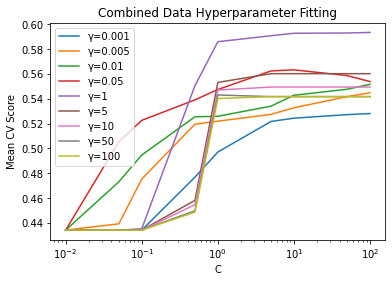

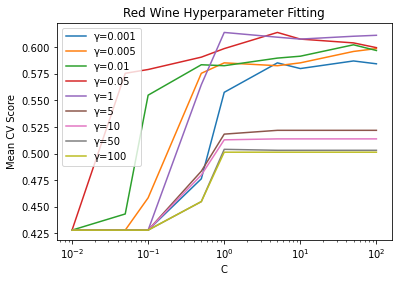

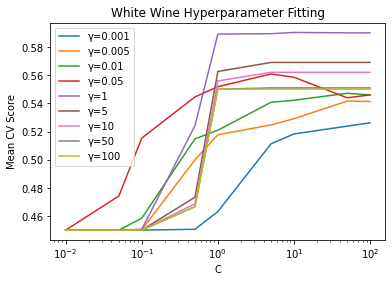

In [100]:
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [0.001, 0.005, 0.01, 0.05, 1, 5, 10, 50, 100], "C": [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
]

rbfKernel = svm.SVC()
rbfKernelRed = svm.SVC()
rbfKernelWhite = svm.SVC()

rbfCV = GridSearchCV(rbfKernel, tuned_parameters, n_jobs = -1, cv = 3, return_train_score = True)
rbfCVRed = GridSearchCV(rbfKernelRed, tuned_parameters, n_jobs = -1, cv = 3, return_train_score = True)
rbfCVWhite = GridSearchCV(rbfKernelWhite, tuned_parameters, n_jobs = -1, cv = 3, return_train_score = True)

print("Combined Wine Data, RBF Kernel:")
rbfCV.fit(Xtrain, ytrain)
print(rbfCV.best_params_)
score(rbfCV.predict(Xtest), ytest, False)
print("\n")
plotCV(rbfCV.cv_results_, tuned_parameters[0]["gamma"], tuned_parameters[0]["C"])
plt.title("Combined Data Hyperparameter Fitting")
plt.savefig('combined.png')

print("Separate Data, RBF Kernel:")
rbfCVRed.fit(XtrainRed, ytrainRed)
rbfCVWhite.fit(XtrainWhite, ytrainWhite)

plt.figure()
plotCV(rbfCVRed.cv_results_, tuned_parameters[0]["gamma"], tuned_parameters[0]["C"])
plt.title("Red Wine Hyperparameter Fitting")
plt.savefig('red.png')

plt.figure()
plotCV(rbfCVWhite.cv_results_, tuned_parameters[0]["gamma"], tuned_parameters[0]["C"])
plt.title("White Wine Hyperparameter Fitting")
plt.savefig('white.png')

redPredict = rbfCVRed.predict(XtestRed)
whitePredict = rbfCVWhite.predict(XtestWhite)
score(np.concatenate((redPredict, whitePredict)), np.concatenate((ytestRed, ytestWhite)), False)
print("\n")

print("\tRed Wine Data, RBF Kernel:")
print("\t" + str(rbfCVRed.best_params_))
score(redPredict, ytestRed, True)
print("\n")


print("\tWhite Wine Data, RBF Kernel:")
print("\t" + str(rbfCVWhite.best_params_))
score(whitePredict, ytestWhite, True)
print("\n")

# Linear Regression

In [101]:
def roundOutput(prediction):
    #Rounds output to 0, 10 range
    result = np.round(prediction)
    result[result < 0] = 0
    result[result > 10] = 10
    return result
    

In [102]:
linReg = LinearRegression().fit(Xtrain, ytrain)
linRegRed = LinearRegression().fit(XtrainRed, ytrainRed)
linRegWhite = LinearRegression().fit(XtrainWhite, ytrainWhite)

predict = roundOutput(linReg.predict(Xtest))
redPredict = roundOutput(linRegRed.predict(XtestRed))
whitePredict = roundOutput(linRegWhite.predict(XtestWhite))

print("Combined Wine Data, RBF Kernel:")
score(predict, ytest, False)
print("\n")

print("Separate Data, RBF Kernel:")
score(np.concatenate((redPredict, whitePredict)), np.concatenate((ytestRed, ytestWhite)), False)
print("\n")

print("\tRed Wine Data, RBF Kernel:")
score(redPredict, ytestRed, True)
print("\n")


print("\tWhite Wine Data, RBF Kernel:")
score(whitePredict, ytestWhite, True)
print("\n")

Combined Wine Data, RBF Kernel:
Accuracy: 54.717948717948715%


Separate Data, RBF Kernel:
Accuracy: 52.871794871794876%


	Red Wine Data, RBF Kernel:
	Accuracy: 57.49999999999999%


	White Wine Data, RBF Kernel:
	Accuracy: 51.36054421768708%


